<a href="https://colab.research.google.com/github/ccwu0918/OpenVINOColabDemo/blob/main/102_pytorch_onnx_to_openvino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ccwu0918/OpenVINOColabDemo/blob/main/102_pytorch_onnx_to_openvino.ipynb)

# Openvino Environment Test 

In [1]:
!cpuinfo

/bin/bash: cpuinfo: command not found


In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


# Install OpenVINO™ Notebooks


In [3]:
%cd /content
!git clone --depth=1 https://github.com/openvinotoolkit/openvino_notebooks.git 

/content
Cloning into 'openvino_notebooks'...
remote: Enumerating objects: 348, done.
remote: Counting objects: 100% (348/348), done.
remote: Compressing objects: 100% (298/298), done.
remote: Total 348 (delta 41), reused 272 (delta 26), pack-reused 0
Receiving objects: 100% (348/348), 122.67 MiB | 23.65 MiB/s, done.
Resolving deltas: 100% (41/41), done.
Checking out files: 100% (256/256), done.


In [4]:
# !sed -i 's/Pillow>=8.3.2/Pillow==9.0.0/g' ./openvino_notebooks/requirements.txt
# !sed -i 's/matplotlib<3.4/\matplotlib==3.1.3/g' ./openvino_notebooks/requirements.txt

In [5]:
!sed -i '/Pillow>=8.3.2/d' ./openvino_notebooks/requirements.txt
!sed -i '/matplotlib<3.4/d' ./openvino_notebooks/requirements.txt

In [6]:
%%time
!pip install --upgrade -r ./openvino_notebooks/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
Ignoring torch: markers 'sys_platform == "darwin"' don't match your environment
Ignoring torchvision: markers 'sys_platform == "darwin"' don't match your environment
     |████████████████████████████████| 5.8 MB 7.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 159.4 MB 26 kB/s 
     |████████████████████████████████| 11.8 MB 53.0 MB/s 
     |████████████████████████████████| 332 kB 58.2 MB/s 
     |████████████████████████████████| 108.4 MB 23 kB/s 
     |████████████████████████████████| 212 kB 55.5 MB/s 
     |████████████████████████████████| 2.7 MB 55.8 MB/s 
     |████████████████████████████████| 394 kB 66.3 MB/s 
     |██████████████

CPU times: user 5.03 s, sys: 777 ms, total: 5.81 s
Wall time: 5min 58s


# 🔁 Restarting Kernel

In [ ]:
## !git clone https://github.com/facebookresearch/detectron2 detectron2_repo
## !pip install -e detectron2_repo

print("🔁 Restarting kernel...")  
print("Runtime is now restarting...")
print('Stopping RunTime! Please run again.')  
# print("You can ignore the error message [Your session crashed for an unknown reason.]")
import os
# os._exit(0)  # restart
os.kill(os.getpid(), 9)
get_ipython().kernel.do_shutdown(True)
# exit()

In [1]:
!source /opt/intel/openvino_2022/setupvars.sh

/bin/bash: /opt/intel/openvino_2022/setupvars.sh: No such file or directory


# Install Open Model Zoo

In [2]:
%cd /content
!git clone --depth=1 https://github.com/openvinotoolkit/open_model_zoo.git
%cd ./open_model_zoo
!git submodule update --init --recursive
%cd /content

/content
Cloning into 'open_model_zoo'...
remote: Enumerating objects: 3188, done.
remote: Counting objects: 100% (3188/3188), done.
remote: Compressing objects: 100% (2376/2376), done.
remote: Total 3188 (delta 992), reused 1526 (delta 693), pack-reused 0
Receiving objects: 100% (3188/3188), 107.55 MiB | 33.97 MiB/s, done.
Resolving deltas: 100% (992/992), done.
Checking out files: 100% (2620/2620), done.
/content/open_model_zoo
Submodule 'demos/thirdparty/gflags' (https://github.com/gflags/gflags.git) registered for path 'demos/thirdparty/gflags'
Cloning into '/content/open_model_zoo/demos/thirdparty/gflags'...
Submodule path 'demos/thirdparty/gflags': checked out 'e171aa2d15ed9eb17054558e0b3a6a413bb01067'
Submodule 'doc' (https://github.com/gflags/gflags.git) registered for path 'demos/thirdparty/gflags/doc'
Cloning into '/content/open_model_zoo/demos/thirdparty/gflags/doc'...
Submodule path 'demos/thirdparty/gflags/doc': checked out '8411df715cf522606e3b1aca386ddfc0b63d34b4'
/conte

In [3]:
# !python -mpip install --user -r ./open_model_zoo/demos/requirements.txt

In [4]:
# !ls /root/.local/bin -al

In [5]:
# !cp /root/.local/bin/*  /usr/local/bin/

In [6]:
# !pip install /content/open_model_zoo/demos/common/python


# Install OpenCV

In [7]:
# !sudo -E /opt/intel/openvino_2022/extras/scripts/download_opencv.sh

# OpenVINO Sample Images

In [8]:
!mkdir /content/sample-images
%cd /content/sample-images
!wget https://github.com/alihussainia/openvino-colab/raw/master/demo_files/images/blue-car.jpg
!wget https://github.com/alihussainia/openvino-colab/raw/master/demo_files/images/sitting-on-car.jpg
!wget https://github.com/alihussainia/openvino-colab/raw/master/demo_files/images/sign.jpg
!wget https://user-images.githubusercontent.com/2350015/97497833-66185d80-196b-11eb-8c96-ce7ed676cbd6.jpg
!mv 97497833-66185d80-196b-11eb-8c96-ce7ed676cbd6.jpg dog.jpg
!wget https://obs.line-scdn.net/0hVK227DTKCWQPSx0dLTZ2MzcdBRU8LRNtLShDAH9NUARyZx46YC5aByseB0gqeEYyL3hCASxDVwMhfxlmYw/w1200 
!mv w1200 people.jpg

/content/sample-images
--2022-07-18 10:50:10--  https://github.com/alihussainia/openvino-colab/raw/master/demo_files/images/blue-car.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alihussainia/openvino-colab/master/demo_files/images/blue-car.jpg [following]
--2022-07-18 10:50:10--  https://raw.githubusercontent.com/alihussainia/openvino-colab/master/demo_files/images/blue-car.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173741 (170K) [image/jpeg]
Saving to: ‘blue-car.jpg’

blue-car.jpg        100%[===================>] 169.67K  --.-KB/s    in 0.02s   

2022-07-18 10:50:10 (10.8 MB/s)

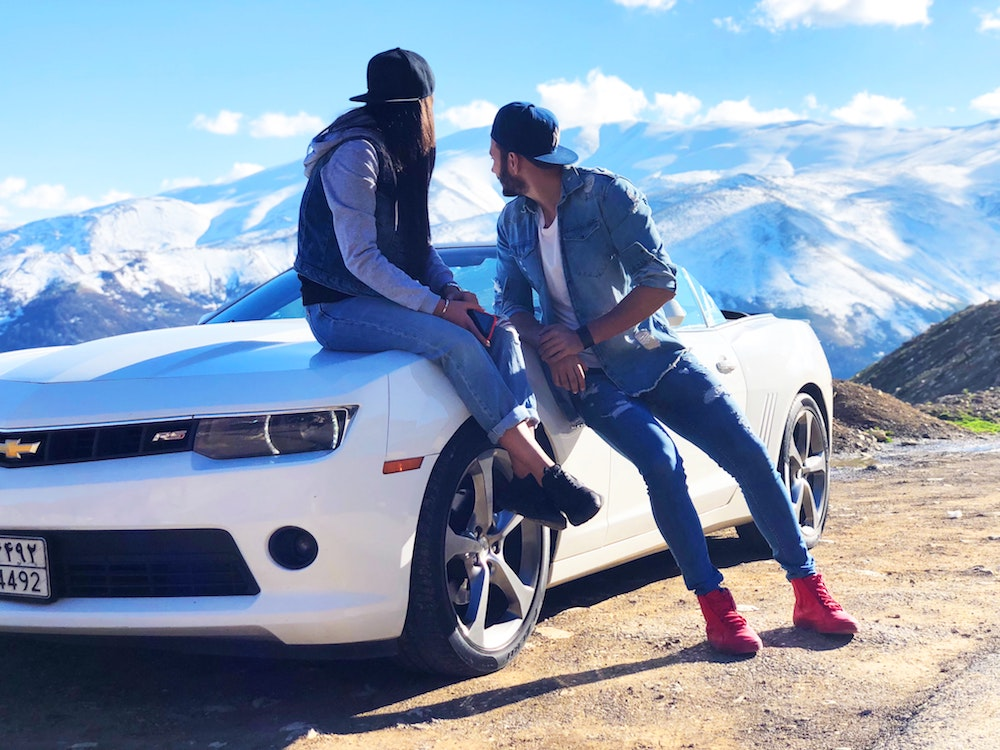

In [9]:
# 以OpenCV檢視輸入影像
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/sample-images/sitting-on-car.jpg') # 讀入指定彩色影像
cv2_imshow(img)  # 顯示影像

In [10]:
%cd /content/openvino_notebooks/notebooks/102-pytorch-onnx-to-openvino

/content/openvino_notebooks/notebooks/102-pytorch-onnx-to-openvino


# Convert a PyTorch Model to ONNX and OpenVINO IR

This tutorial demonstrates step-by-step instructions to perform inference on a PyTorch semantic segmentation model using OpenVINO's Inference Engine.

First, the PyTorch model is converted to [ONNX](https://onnx.ai/) and OpenVINO Intermediate Representation (IR) formats. Then the ONNX and IR models are loaded in OpenVINO Inference Engine to show model predictions. The model is pre-trained on the [CityScapes](https://www.cityscapes-dataset.com) dataset. The source of the model is [FastSeg](https://github.com/ekzhang/fastseg).

## Preparation

### Imports


```
# for Intel® DevCloud
import os
import sys

sys.path.append(os.path.expanduser('~/.local/lib/python3.6/site-packages/'))
```

In [11]:
import sys
import time
from pathlib import Path

import cv2
import numpy as np
import torch
from IPython.display import Markdown, display
from fastseg import MobileV3Large
from openvino.runtime import Core

# sys.path.append("../utils") -->
sys.path.append("/content/openvino_notebooks/notebooks/utils")
from notebook_utils import CityScapesSegmentation, segmentation_map_to_image, viz_result_image

### Settings

Set the name for the model, and the image width and height that will be used for the network. CityScapes is pretrained on images of 2048x1024. Using smaller dimensions will impact model accuracy, but will improve inference speed. 

In [12]:
IMAGE_WIDTH = 1024  # Suggested values: 2048, 1024 or 512. The minimum width is 512.
# Set IMAGE_HEIGHT manually for custom input sizes. Minimum height is 512
IMAGE_HEIGHT = 1024 if IMAGE_WIDTH == 2048 else 512
DIRECTORY_NAME = "model"
BASE_MODEL_NAME = DIRECTORY_NAME + f"/fastseg{IMAGE_WIDTH}"

# Paths where PyTorch, ONNX and OpenVINO IR models will be stored
model_path = Path(BASE_MODEL_NAME).with_suffix(".pth")
onnx_path = model_path.with_suffix(".onnx")
ir_path = model_path.with_suffix(".xml")

### Download the Fastseg Model

Download, load and save the model with pretrained weights. This may take some time if you have not downloaded the model before.

In [13]:
print("Downloading the Fastseg model (if it has not been downloaded before)....")
model = MobileV3Large.from_pretrained().cpu().eval()
print("Loaded PyTorch Fastseg model")

# Save the model
model_path.parent.mkdir(exist_ok=True)
torch.save(model.state_dict(), str(model_path))
print(f"Model saved at {model_path}")

Loading pretrained model mobilev3large-lraspp with F=128...


Downloading: "https://github.com/ekzhang/fastseg/releases/download/v0.1-weights/mobilev3large-lraspp-f128-9cbabfde.pt" to /root/.cache/torch/hub/checkpoints/mobilev3large-lraspp-f128-9cbabfde.pt


  0%|          | 0.00/25.3M [00:00<?, ?B/s]

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_mobilenetv3_large_100-427764d5.pth" to /root/.cache/torch/hub/checkpoints/tf_mobilenetv3_large_100-427764d5.pth


Loaded PyTorch Fastseg model
Model saved at model/fastseg1024.pth


In [34]:
!ls /root/.cache/torch/hub/checkpoints/ -al

total 47428
drwxr-xr-x 2 root root     4096 Jul 18 10:50 .
drwxr-xr-x 3 root root     4096 Jul 18 10:50 ..
-rw------- 1 root root 26476800 Jul 18 10:50 mobilev3large-lraspp-f128-9cbabfde.pt
-rw------- 1 root root 22076649 Jul 18 10:50 tf_mobilenetv3_large_100-427764d5.pth


## ONNX Model Conversion

### Convert PyTorch model to ONNX

The output for this cell will show some warnings. These are most likely harmless. Conversion succeeded if the last line of the output says `ONNX model exported to fastseg1024.onnx.` 

In [14]:
if not onnx_path.exists():
    dummy_input = torch.randn(1, 3, IMAGE_HEIGHT, IMAGE_WIDTH)

    # For the Fastseg model, setting do_constant_folding to False is required
    # for PyTorch>1.5.1
    torch.onnx.export(
        model,
        dummy_input,
        onnx_path,
        opset_version=11,
        do_constant_folding=False,
    )
    print(f"ONNX model exported to {onnx_path}.")
else:
    print(f"ONNX model {onnx_path} already exists.")

/usr/local/lib/python3.7/dist-packages/geffnet/conv2d_layers.py:39: TracerWarning: Converting a tensor to a Python float might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  return max((math.ceil(i / s) - 1) * s + (k - 1) * d + 1 - i, 0)
/usr/local/lib/python3.7/dist-packages/geffnet/conv2d_layers.py:39: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  return max((math.ceil(i / s) - 1) * s + (k - 1) * d + 1 - i, 0)
/usr/local/lib/python3.7/dist-packages/geffnet/conv2d_layers.py:63: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python va

ONNX model exported to model/fastseg1024.onnx.


### Convert ONNX Model to OpenVINO IR Format

Call the OpenVINO Model Optimizer tool to convert the ONNX model to OpenVINO IR with FP16 precision. The models are saved to the current directory. We add the mean values to the model and scale the output with the standard deviation with `--scale_values`. With these options, it is not necessary to normalize input data before propagating it through the network.

See the [Model Optimizer Developer Guide](https://docs.openvino.ai/latest/openvino_docs_MO_DG_Deep_Learning_Model_Optimizer_DevGuide.html) for more information about Model Optimizer.

Executing this command may take a while. There may be some errors or warnings in the output. Model Optimization was successful if the last lines of the output include `[ SUCCESS ] Generated IR version 11 model.`

In [15]:
# Construct the command for Model Optimizer
mo_command = f"""mo
                 --input_model "{onnx_path}"
                 --input_shape "[1,3, {IMAGE_HEIGHT}, {IMAGE_WIDTH}]"
                 --mean_values="[123.675, 116.28 , 103.53]"
                 --scale_values="[58.395, 57.12 , 57.375]"
                 --data_type FP16
                 --output_dir "{model_path.parent}"
                 """
mo_command = " ".join(mo_command.split())
print("Model Optimizer command to convert the ONNX model to OpenVINO:")
display(Markdown(f"`{mo_command}`"))

Model Optimizer command to convert the ONNX model to OpenVINO:


`mo --input_model "model/fastseg1024.onnx" --input_shape "[1,3, 512, 1024]" --mean_values="[123.675, 116.28 , 103.53]" --scale_values="[58.395, 57.12 , 57.375]" --data_type FP16 --output_dir "model"`

In [16]:
if not ir_path.exists():
    print("Exporting ONNX model to IR... This may take a few minutes.")
    mo_result = %sx $mo_command
    print("\n".join(mo_result))
else:
    print(f"IR model {ir_path} already exists.")

Exporting ONNX model to IR... This may take a few minutes.
Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/content/openvino_notebooks/notebooks/102-pytorch-onnx-to-openvino/model/fastseg1024.onnx
	- Path for generated IR: 	/content/openvino_notebooks/notebooks/102-pytorch-onnx-to-openvino/model
	- IR output name: 	fastseg1024
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	[1,3, 512, 1024]
	- Source layout: 	Not specified
	- Target layout: 	Not specified
	- Layout: 	Not specified
	- Mean values: 	[123.675, 116.28 , 103.53]
	- Scale values: 	[58.395, 57.12 , 57.375]
	- Scale factor: 	Not specified
	- Precision of IR: 	FP16
	- Enable fusing: 	True
	- User transformations: 	Not specified
	- Reverse input channels: 	False
	- Enable IR generation for fixed input shape: 	False
	- Use the transformations conf

## Show Results

Confirm that the segmentation results look as expected, by comparing model predictions on the ONNX, IR and PyTorch model

### Load and Preprocess an Input Image

For the OpenVINO model, normalization is moved to the model. For the ONNX and PyTorch models, images need to be normalized before propagating through the network. A sample image from the [Mapillary Vistas](https://www.mapillary.com/dataset/vistas) dataset is provided for inference.

In [17]:
def normalize(image: np.ndarray) -> np.ndarray:
    """
    Normalize the image to the given mean and standard deviation
    for CityScapes models.
    """
    image = image.astype(np.float32)
    mean = (0.485, 0.456, 0.406)
    std = (0.229, 0.224, 0.225)
    image /= 255.0
    image -= mean
    image /= std
    return image

In [18]:
image_filename = "data/street.jpg"
# image_filename = "/content/sample-images/people.jpg"
# image_filename = "/content/sample-images/sitting-on-car.jpg"
image = cv2.cvtColor(cv2.imread(image_filename), cv2.COLOR_BGR2RGB)

resized_image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
normalized_image = normalize(resized_image)

# Convert the resized images to network input shape
input_image = np.expand_dims(np.transpose(resized_image, (2, 0, 1)), 0)
normalized_input_image = np.expand_dims(np.transpose(normalized_image, (2, 0, 1)), 0)

### Load the OpenVINO IR Network and Run Inference on the ONNX model

Inference Engine can load ONNX models directly. We first load the ONNX model, do inference and show the results. After that we load the model that was converted to Intermediate Representation (IR) with Model Optimizer and do inference on that model and show the results on an image from [Mapillary Vistas](https://www.mapillary.com/dataset/vistas).

#### 1. ONNX Model in Inference Engine

In [19]:
# Load network to Inference Engine
ie = Core()
model_onnx = ie.read_model(model=onnx_path)
compiled_model_onnx = ie.compile_model(model=model_onnx, device_name="CPU")

output_layer_onnx = compiled_model_onnx.output(0)

# Run inference on the input image
res_onnx = compiled_model_onnx([normalized_input_image])[output_layer_onnx]

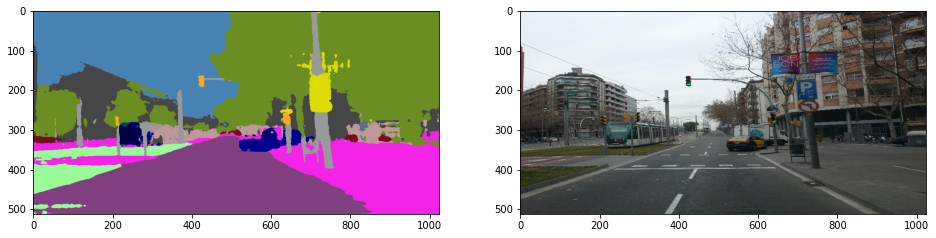

In [20]:
# Convert network result to segmentation map and display the result
result_mask_onnx = np.squeeze(np.argmax(res_onnx, axis=1)).astype(np.uint8)
viz_result_image(
    image,
    segmentation_map_to_image(result_mask_onnx, CityScapesSegmentation.get_colormap()),
    resize=True,
)

#### 2. IR Model in Inference Engine

In [21]:
# Load the network in Inference Engine
ie = Core()
model_ir = ie.read_model(model=ir_path)
compiled_model_ir = ie.compile_model(model=model_ir, device_name="CPU")

# Get input and output layers
output_layer_ir = compiled_model_ir.output(0)

# Run inference on the input image
res_ir = compiled_model_ir([input_image])[output_layer_ir]

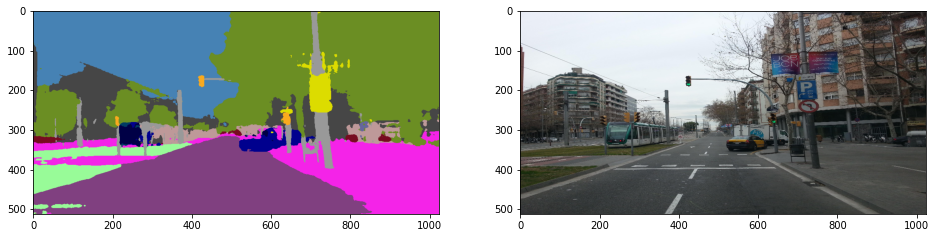

In [22]:
result_mask_ir = np.squeeze(np.argmax(res_ir, axis=1)).astype(np.uint8)
viz_result_image(
    image,
    segmentation_map_to_image(result=result_mask_ir, colormap=CityScapesSegmentation.get_colormap()),
    resize=True,
)

## PyTorch Comparison

Do inference on the PyTorch model to verify that the output visually looks the same as the output on the ONNX/IR models.

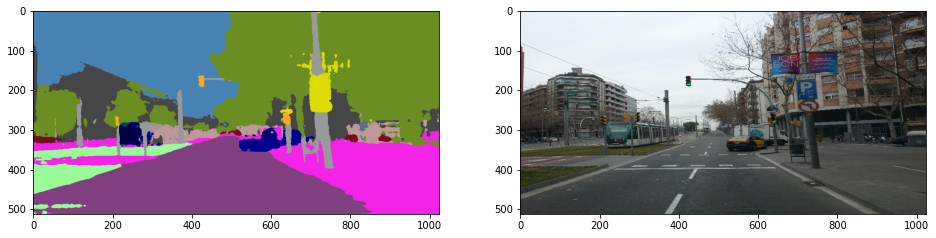

In [23]:
with torch.no_grad():
    result_torch = model(torch.as_tensor(normalized_input_image).float())

result_mask_torch = torch.argmax(result_torch, dim=1).squeeze(0).numpy().astype(np.uint8)
viz_result_image(
    image,
    segmentation_map_to_image(result=result_mask_torch, colormap=CityScapesSegmentation.get_colormap()),
    resize=True,
)

## Performance Comparison

Measure the time it takes to do inference on twenty images. This gives an indication of performance. For more accurate benchmarking, use the [OpenVINO Benchmark Tool](https://docs.openvino.ai/latest/openvino_inference_engine_tools_benchmark_tool_README.html). Note that many optimizations are possible to improve the performance. 

In [24]:
num_images = 20

start = time.perf_counter()
for _ in range(num_images):
    compiled_model_onnx([normalized_input_image])
end = time.perf_counter()
time_onnx = end - start
print(
    f"ONNX model in Inference Engine/CPU: {time_onnx/num_images:.3f} "
    f"seconds per image, FPS: {num_images/time_onnx:.2f}"
)

start = time.perf_counter()
for _ in range(num_images):
    compiled_model_ir([input_image])
end = time.perf_counter()
time_ir = end - start
print(
    f"IR model in Inference Engine/CPU: {time_ir/num_images:.3f} "
    f"seconds per image, FPS: {num_images/time_ir:.2f}"
)

with torch.no_grad():
    start = time.perf_counter()
    for _ in range(num_images):
        model(torch.as_tensor(input_image).float())
    end = time.perf_counter()
    time_torch = end - start
print(
    f"PyTorch model on CPU: {time_torch/num_images:.3f} seconds per image, "
    f"FPS: {num_images/time_torch:.2f}"
)

if "GPU" in ie.available_devices:
    compiled_model_onnx_gpu = ie.compile_model(model=model_onnx, device_name="GPU")
    start = time.perf_counter()
    for _ in range(num_images):
        compiled_model_onnx_gpu([input_image])
    end = time.perf_counter()
    time_onnx_gpu = end - start
    print(
        f"ONNX model in Inference Engine/GPU: {time_onnx_gpu/num_images:.3f} "
        f"seconds per image, FPS: {num_images/time_onnx_gpu:.2f}"
    )

    compiled_model_ir_gpu = ie.compile_model(model=model_ir, device_name="GPU")
    start = time.perf_counter()
    for _ in range(num_images):
        compiled_model_ir_gpu([input_image])
    end = time.perf_counter()
    time_ir_gpu = end - start
    print(
        f"IR model in Inference Engine/GPU: {time_ir_gpu/num_images:.3f} "
        f"seconds per image, FPS: {num_images/time_ir_gpu:.2f}"
    )

ONNX model in Inference Engine/CPU: 0.722 seconds per image, FPS: 1.39
IR model in Inference Engine/CPU: 0.738 seconds per image, FPS: 1.36
PyTorch model on CPU: 2.621 seconds per image, FPS: 0.38


**Show Device Information**

In [25]:
devices = ie.available_devices
for device in devices:
    device_name = ie.get_property(device_name=device, name="FULL_DEVICE_NAME")
    print(f"{device}: {device_name}")

CPU:            Intel(R) Xeon(R) CPU @ 2.20GHz


# 下載模型檔案


In [26]:
from google.colab import files
files.download("model/fastseg1024.onnx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 使用Netron觀看模型


1. [https://github.com/lutzroeder/netron](https://github.com/lutzroeder/netron)
2. [https://netron.app/](https://netron.app/)

# Camera Capture
Using a webcam to capture images for processing on the runtime.

In [27]:
from IPython import display
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = display.Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display.display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


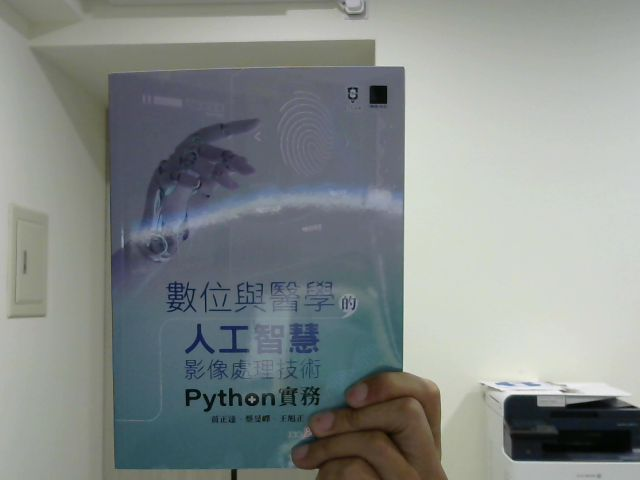

In [28]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display.display(display.Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [29]:
image_filename = "./photo.jpg"
# image_filename = "/content/sample-images/people.jpg"
# image_filename = "/content/sample-images/sitting-on-car.jpg"
image = cv2.cvtColor(cv2.imread(image_filename), cv2.COLOR_BGR2RGB)

resized_image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
normalized_image = normalize(resized_image)

# Convert the resized images to network input shape
input_image = np.expand_dims(np.transpose(resized_image, (2, 0, 1)), 0)
normalized_input_image = np.expand_dims(np.transpose(normalized_image, (2, 0, 1)), 0)

### Load the OpenVINO IR Network and Run Inference on the ONNX model

Inference Engine can load ONNX models directly. We first load the ONNX model, do inference and show the results. After that we load the model that was converted to Intermediate Representation (IR) with Model Optimizer and do inference on that model and show the results on an image from [Mapillary Vistas](https://www.mapillary.com/dataset/vistas).

#### 1. ONNX Model in Inference Engine

In [30]:
# Load network to Inference Engine
ie = Core()
model_onnx = ie.read_model(model=onnx_path)
compiled_model_onnx = ie.compile_model(model=model_onnx, device_name="CPU")

output_layer_onnx = compiled_model_onnx.output(0)

# Run inference on the input image
res_onnx = compiled_model_onnx([normalized_input_image])[output_layer_onnx]

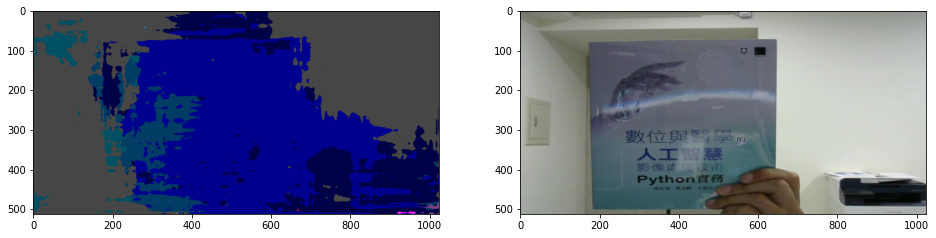

In [31]:
# Convert network result to segmentation map and display the result
result_mask_onnx = np.squeeze(np.argmax(res_onnx, axis=1)).astype(np.uint8)
viz_result_image(
    image,
    segmentation_map_to_image(result_mask_onnx, CityScapesSegmentation.get_colormap()),
    resize=True,
)

#### 2. IR Model in Inference Engine

In [32]:
# Load the network in Inference Engine
ie = Core()
model_ir = ie.read_model(model=ir_path)
compiled_model_ir = ie.compile_model(model=model_ir, device_name="CPU")

# Get input and output layers
output_layer_ir = compiled_model_ir.output(0)

# Run inference on the input image
res_ir = compiled_model_ir([input_image])[output_layer_ir]

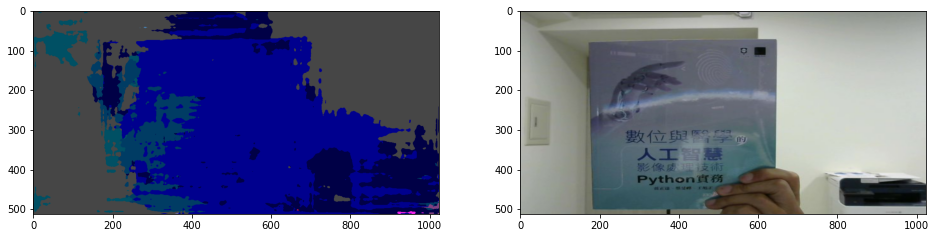

In [33]:
result_mask_ir = np.squeeze(np.argmax(res_ir, axis=1)).astype(np.uint8)
viz_result_image(
    image,
    segmentation_map_to_image(result=result_mask_ir, colormap=CityScapesSegmentation.get_colormap()),
    resize=True,
)

## References

* [Fastseg](https://github.com/ekzhang/fastseg)
* [PIP install openvino-dev](https://github.com/openvinotoolkit/openvino/blob/releases/2021/3/docs/install_guides/pypi-openvino-dev.md)
* [OpenVINO ONNX support](https://docs.openvino.ai/2021.4/openvino_docs_IE_DG_ONNX_Support.html)
* [Model Optimizer Documentation](https://docs.openvino.ai/latest/openvino_docs_MO_DG_prepare_model_convert_model_Converting_Model_General.html)
